In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.inspection import permutation_importance


In [10]:
df = pd.read_csv("D:\yield_df.csv")
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [11]:
# Step 1: Drop the 'Unnamed: 0' column as it is unnecessary
df = df.drop(columns=['Unnamed: 0'])

In [12]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
df_encoded = df.copy()

# Columns to encode
columns_to_encode = ['Area', 'Item']

for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df[column])

# Show the encoded DataFrame
df_encoded

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.00,16.37
1,0,3,1990,66667,1485.0,121.00,16.37
2,0,4,1990,23333,1485.0,121.00,16.37
3,0,5,1990,12500,1485.0,121.00,16.37
4,0,6,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657.0,2550.07,19.76
28238,100,5,2013,3066,657.0,2550.07,19.76
28239,100,6,2013,13142,657.0,2550.07,19.76
28240,100,7,2013,22222,657.0,2550.07,19.76


In [13]:
# Step 5: Scaling the numerical features (Standardization)
scaler = StandardScaler()


# List of features to scale
features_to_scale = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp','Year']

# Scale the features
scaled_features = scaler.fit_transform(df_encoded[features_to_scale])


In [14]:
# Step 6: Add scaled features back to the dataframe
df_encoded[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp','Year']] = scaled_features
df_encoded

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,-1.637075,-0.476020,0.473294,-0.616366,-0.661069
1,0,3,-1.637075,-0.122257,0.473294,-0.616366,-0.661069
2,0,4,-1.637075,-0.632338,0.473294,-0.616366,-0.661069
3,0,5,-1.637075,-0.759852,0.473294,-0.616366,-0.661069
4,0,6,-1.637075,-0.824592,0.473294,-0.616366,-0.661069
...,...,...,...,...,...,...,...
28237,100,4,1.624512,-0.641190,-0.693232,-0.575853,-0.123991
28238,100,5,1.624512,-0.870899,-0.693232,-0.575853,-0.123991
28239,100,6,1.624512,-0.752295,-0.693232,-0.575853,-0.123991
28240,100,7,1.624512,-0.645415,-0.693232,-0.575853,-0.123991


In [15]:
# Step 7: Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['hg/ha_yield'])  # Features (excluding target)
y = df_encoded['hg/ha_yield']  # Target variable

In [16]:
# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [17]:
# Dropout rates to test
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]


# Dictionary to store the results
results = {}

# Loop to test each dropout rate
for dropout_rate in dropout_rates:
    print(f"Training model with Dropout rate: {dropout_rate}")
    
    # Define the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),  # Dropout with dynamic rate
        Dense(64, activation='relu'),
        Dropout(dropout_rate),  # Dropout with dynamic rate
        Dense(1)  # Output layer
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
    # Train the model
    history = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_val, y_val), 
        epochs=50, 
        batch_size=32, 
        verbose=0  # Suppress detailed output
    )
    
    # Predictions for evaluation
    y_pred = model.predict(X_test, verbose=0)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Dropout rate: {dropout_rate} - Mean Squared Error (MSE): {mse:.4f}, Mean Absolute Error (MAE): {mae:.4f}")
    
    # Store the results
    results[dropout_rate] = {'MSE': mse, 'MAE': mae}

# Determine the best dropout rate based on MAE
best_dropout_rate = min(results, key=lambda rate: results[rate]['MAE'])
print("\nResults for all Dropout rates:")
for rate, metrics in results.items():
    print(f"Dropout rate: {rate}, MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}")

print(f"\nBest Dropout rate: {best_dropout_rate} with MSE: {results[best_dropout_rate]['MSE']:.4f} and MAE: {results[best_dropout_rate]['MAE']:.4f}")

Training model with Dropout rate: 0.1
Dropout rate: 0.1 - Mean Squared Error (MSE): 0.1555, Mean Absolute Error (MAE): 0.2769
Training model with Dropout rate: 0.2
Dropout rate: 0.2 - Mean Squared Error (MSE): 0.2180, Mean Absolute Error (MAE): 0.3122
Training model with Dropout rate: 0.3
Dropout rate: 0.3 - Mean Squared Error (MSE): 0.2816, Mean Absolute Error (MAE): 0.3597
Training model with Dropout rate: 0.4
Dropout rate: 0.4 - Mean Squared Error (MSE): 0.3260, Mean Absolute Error (MAE): 0.3928
Training model with Dropout rate: 0.5
Dropout rate: 0.5 - Mean Squared Error (MSE): 0.3580, Mean Absolute Error (MAE): 0.4383

Results for all Dropout rates:
Dropout rate: 0.1, MSE: 0.1555, MAE: 0.2769
Dropout rate: 0.2, MSE: 0.2180, MAE: 0.3122
Dropout rate: 0.3, MSE: 0.2816, MAE: 0.3597
Dropout rate: 0.4, MSE: 0.3260, MAE: 0.3928
Dropout rate: 0.5, MSE: 0.3580, MAE: 0.4383

Best Dropout rate: 0.1 with MSE: 0.1555 and MAE: 0.2769


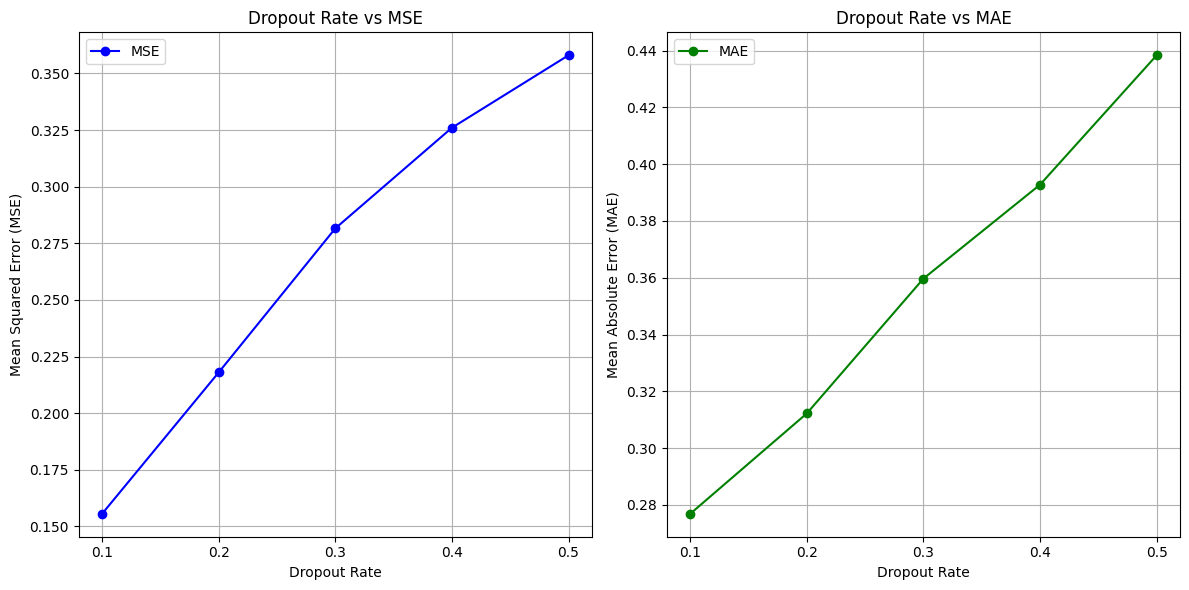

In [18]:
# Visualization of results
dropout_rates = list(results.keys())
mse_values = [results[rate]['MSE'] for rate in dropout_rates]
mae_values = [results[rate]['MAE'] for rate in dropout_rates]

# Plot MSE and MAE
plt.figure(figsize=(12, 6))

# Subplot 1: MSE
plt.subplot(1, 2, 1)
plt.plot(dropout_rates, mse_values, marker='o', label='MSE', color='blue')
plt.title('Dropout Rate vs MSE')
plt.xlabel('Dropout Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(dropout_rates)
plt.grid(True)
plt.legend()

# Subplot 2: MAE
plt.subplot(1, 2, 2)
plt.plot(dropout_rates, mae_values, marker='o', label='MAE', color='green')
plt.title('Dropout Rate vs MAE')
plt.xlabel('Dropout Rate')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(dropout_rates)
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [19]:
final_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(best_dropout_rate),  # Dropout with dynamic rate
        Dense(64, activation='relu'),
        Dropout(best_dropout_rate),  # Dropout with dynamic rate
        #Dense(64,activation='relu'),
        #Dropout(dropout_rate)
        Dense(1)  # Output layer
    ])
# Compile the model
final_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
# Train the model
history = final_model.fit(
        X_train, 
        y_train, 
        validation_data=(X_val, y_val), 
        epochs=50, 
        batch_size=32, 
        verbose=0  # Suppress detailed output
    )

 # Predictions for evaluation
y_pred = final_model.predict(X_test, verbose=0)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}, Mean Absolute Error (MAE): {mae:.4f}")
    

Mean Squared Error (MSE): 0.1972, Mean Absolute Error (MAE): 0.2957


177/177 [==============================] - 0s 533us/step


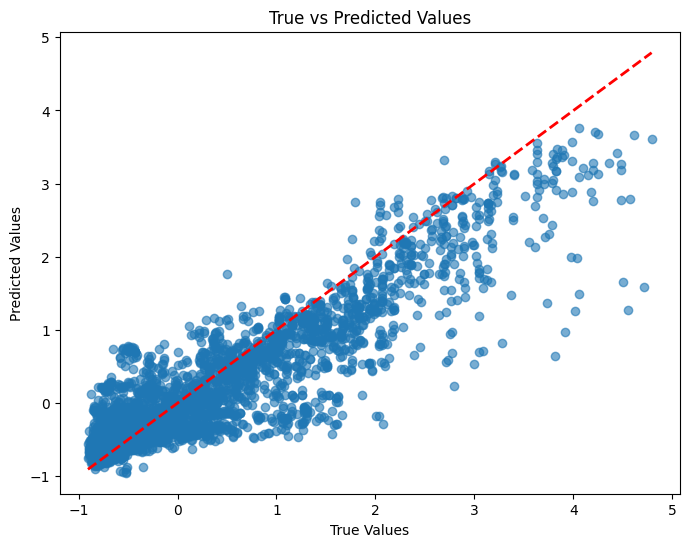

In [20]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

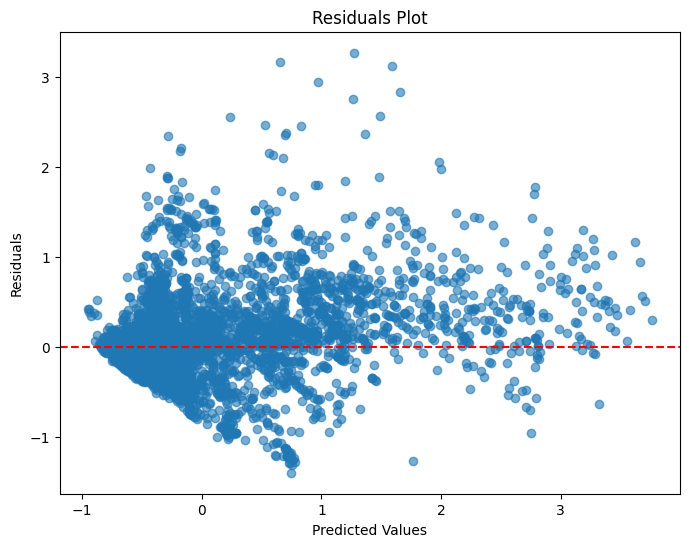

In [21]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


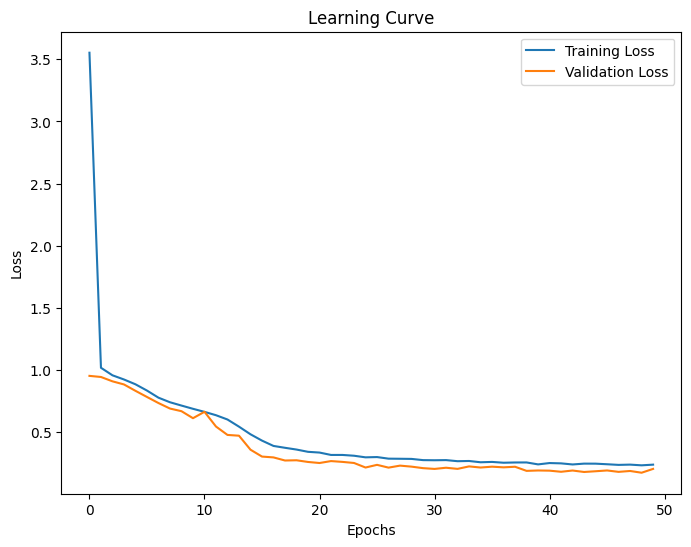

In [22]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


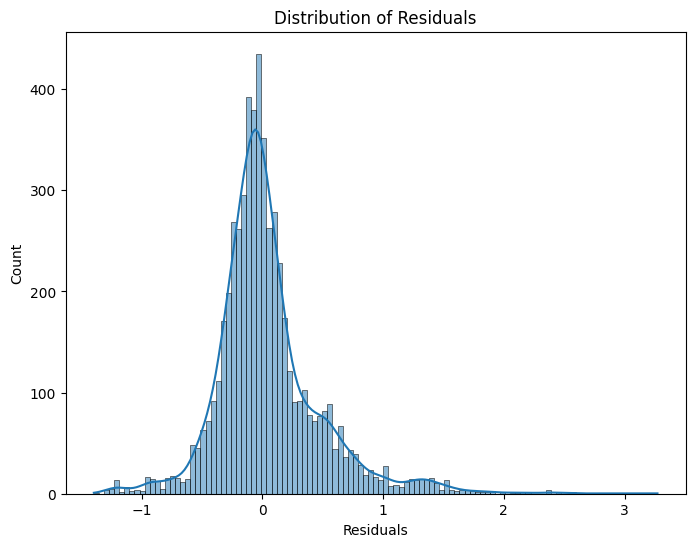

In [23]:
# Plot histogram or KDE for residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

First layer weights shape: (6, 128)


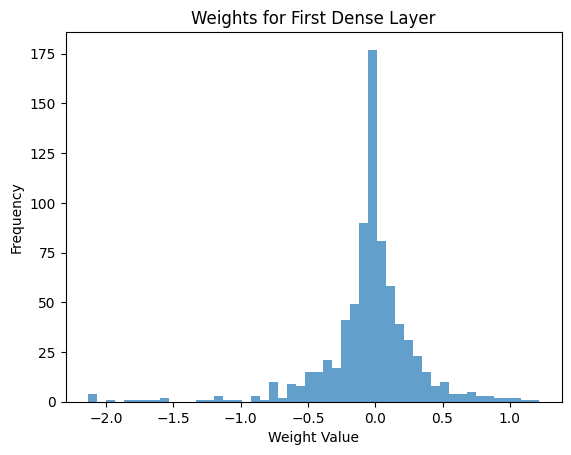

In [24]:
# Access weights and biases of the first and second dense layers
if isinstance(model.layers[0], Dense):
    weights1, biases1 = model.layers[0].get_weights()  # First Dense layer
    print("First layer weights shape:", weights1.shape)
    plt.hist(weights1.flatten(), bins=50, alpha=0.7)
    plt.title('Weights for First Dense Layer')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()




In [25]:
# Perform permutation importance using lambda to calculate Mean Squared Error
result = permutation_importance(
    final_model, 
    X_test, 
    y_test, 
    n_repeats=10, 
    random_state=42, 
    scoring=lambda model, X, y: mean_squared_error(y, model.predict(X))
)

177/177 [==============================] - 0s 599us/step


Feature 0: -0.2106547998518212
Feature 1: -1.1724216739581492
Feature 2: -0.04477857829315993
Feature 3: -0.24950150982194708
Feature 4: -0.2177332775353225
Feature 5: -0.2462071594493674


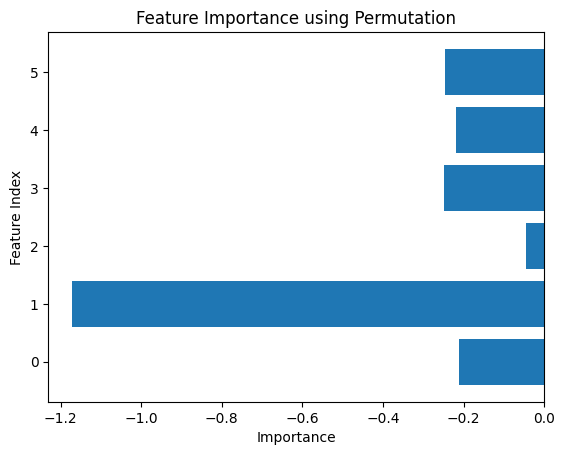

In [26]:
# Print and plot the feature importances
importance = result.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i}: {imp}")

# Plot feature importance
import matplotlib.pyplot as plt
plt.barh(range(X_test.shape[1]), importance)
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance using Permutation')
plt.show()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Replace 'final_model.h5' with your actual saved model file
model_file = "final_model.h5"

# Load the trained model
final_model = load_model(model_file)

# Load the dataset from CSV
df = pd.read_csv("D:\yield_df.csv")  # Replace with the correct path if needed

# Extract unique values for "Area" and "Item" columns
areas = df['Area'].unique().tolist()  # Extract unique Area values
items = df['Item'].unique().tolist()  # Extract unique Item values

# Initialize LabelEncoders for "Area" and "Item"
area_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Fit LabelEncoders on the unique values extracted from the dataset
area_encoder.fit(areas)
item_encoder.fit(items)

# GUI Application
class YieldPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Yield Prediction App")
        
        # Feature labels and entry widgets
        self.features = ['Area', 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year']
        self.entries = {}
        
        tk.Label(self.root, text="Enter Feature Values", font=("Arial", 16)).grid(row=0, columnspan=2, pady=10)
        
        for i, feature in enumerate(self.features):
            tk.Label(self.root, text=feature).grid(row=i+1, column=0, padx=10, pady=5, sticky='w')
            entry = tk.Entry(self.root)
            entry.grid(row=i+1, column=1, padx=10, pady=5)
            self.entries[feature] = entry
        
        # Predict Button
        predict_button = tk.Button(self.root, text="Predict Yield", command=self.predict_yield)
        predict_button.grid(row=len(self.features)+1, columnspan=2, pady=10)
        
        # Output label
        self.result_label = tk.Label(self.root, text="", font=("Arial", 14), fg="blue")
        self.result_label.grid(row=len(self.features)+2, columnspan=2, pady=10)
    
    def predict_yield(self):
        try:
            # Gather inputs and display raw values
            input_data = []
            raw_values = {}
            for feature in self.features:
                value = self.entries[feature].get()
                if not value:
                    raise ValueError(f"Please enter a value for {feature}")
                
                raw_values[feature] = value  # Store raw value
                
                # Handle input for "Area" and "Item" with raw value
                if feature == 'Area':
                    value = value.strip().title()  # Normalize case and remove extra spaces
                    if value not in areas:
                        raise ValueError(f"Unknown Area: {value}. Valid values: {areas}")
                    # Directly store the raw area value for display
                    input_data.append(value)
                
                elif feature == 'Item':
                    value = value.strip().title()  # Normalize case and remove extra spaces
                    if value not in items:
                        raise ValueError(f"Unknown Item: {value}. Valid values: {items}")
                    # Directly store the raw item value for display
                    input_data.append(value)
                
                else:
                    input_data.append(float(value))  # For numeric features, store as float
            
            # Display the raw input data in the result_label
            raw_input_display = "\n".join([f"{key}: {val}" for key, val in raw_values.items()])
            self.result_label.config(text=f"Raw Input Data:\n{raw_input_display}")
            
            # Now encode 'Area' and 'Item' for prediction using LabelEncoder (to show pre-scaling values in the model)
            area_encoded = area_encoder.transform([input_data[0]])[0]  # Encode Area for the model prediction
            item_encoded = item_encoder.transform([input_data[1]])[0]  # Encode Item for the model prediction
            
            # Replace raw Area and Item values with encoded values
            input_data[0] = area_encoded
            input_data[1] = item_encoded
            
            # Convert to numpy array and reshape for model
            input_array = np.array(input_data).reshape(1, -1)
            
            # Predict using the model
            prediction = final_model.predict(input_array, verbose=0)
            
            # Show the prediction result after applying scaling
            self.result_label.config(text=f"{self.result_label.cget('text')}\nPredicted Yield: {prediction[0][0]:.2f} hg/ha")
        
        except ValueError as e:
            messagebox.showerror("Input Error", str(e))
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {e}")

if __name__ == "__main__":
    root = tk.Tk()
    app = YieldPredictionApp(root)
    root.mainloop()
